# Kickstarter

Geting insights using the data <BR />
What will make your project at Kickstarter successful?

## Import stuff

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load the data

In [3]:
data = pd.read_csv('./clean_data.csv')
data.head()

,project id,name,url,category,subcategory,city,state,global,status,canceled,...,comments,duration,weekday,weekday_nr,nr_in_month,month,month_nr,year,time,date
0,39409,while the trees sleep,http://www.kickstarter.com/projects/emiliesaba...,Film_Video,Short Film,Columbia,MO,US,successful,0,...,2,30.00,Fri,5,19,Aug,8,2011,19:28:17 -0000,2011-08-19
1,126581,educational online trading card game,http://www.kickstarter.com/projects/972789543/...,Games,Board_Card Games,Maplewood,NJ,US,failed,0,...,0,47.18,Mon,1,2,Aug,8,2010,03:59:00 -0000,2010-08-02
2,138119,strum,http://www.kickstarter.com/projects/185476022/...,Film_Video,Animation,Los Angeles,CA,US,live,0,...,0,28.00,Fri,5,8,Jun,6,2012,00:00:31 -0000,2012-06-08
3,237090,getting over - one son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film_Video,Documentary,Los Angeles,CA,US,successful,0,...,0,32.22,Sun,7,8,Apr,4,2012,02:14:00 -0000,2012-04-08
4,246101,the launch of flyegrlroyalty &quot;the new nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,Novi,MI,US,failed,0,...,0,30.00,Wed,3,1,Jun,6,2011,15:25:39 -0000,2011-06-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45797 entries, 0 to 45796
Data columns (total 34 columns):
project id           45797 non-null int64
name                 45797 non-null object
url                  45797 non-null object
category             45797 non-null object
subcategory          45797 non-null object
city                 45797 non-null object
state                45796 non-null object
global               45797 non-null object
status               45797 non-null object
canceled             45797 non-null int64
failed               45797 non-null int64
live                 45797 non-null int64
successful           45797 non-null int64
suspended            45797 non-null int64
goal                 45797 non-null float64
pledged              45797 non-null float64
funded percentage    45797 non-null float64
backers              45797 non-null int64
funded date          45797 non-null object
levels               45797 non-null int64
reward levels        45797 non-null 

In [5]:
# Handle the null value that we have in the state column

In [6]:
data.shape

(45797, 34)

### Fail rate and sucess rate per state/country (brute force solution)

In [7]:
apelsin = data.groupby('state').sum()
apelsin.head()

,project id,canceled,failed,live,successful,suspended,goal,pledged,funded percentage,backers,levels,min reward level,max reward level,updates,comments,duration,weekday_nr,nr_in_month,month_nr,year
state,,,,,,,,,,,,,,,,,,,,
AK,111596899010,1,54,13,41,0,1386764.00,352367.0,57.109109,4667,797,1256,226069,346,266,4177.81,440,1734,599,219248
AL,176813834102,0,88,19,59,0,2080352.00,475996.0,86.402034,6596,1280,1101,268018,510,697,6608.23,753,2600,963,333875
AR,121944410094,0,54,13,38,0,928361.00,212493.0,63.912967,3008,820,761,158371,347,287,4206.37,434,1580,553,211196
AZ,698237561472,3,319,78,246,0,8092358.09,2072754.0,433.139596,29974,5148,4640,1284963,2518,3869,25469.19,2701,9651,3900,1299342
Afghanistan,17327868835,0,5,2,9,0,194400.00,90443.0,13.175067,859,111,141,35755,117,78,571.53,76,196,70,32186


In [8]:
apelsin = apelsin.drop(['project id','goal','pledged','funded percentage','duration','backers','levels',
                       'updates','comments','weekday_nr','nr_in_month','month_nr','year', 'min reward level', 
                        'max reward level'], axis=1)
apelsin.head()

,canceled,failed,live,successful,suspended
state,,,,,
AK,1,54,13,41,0
AL,0,88,19,59,0
AR,0,54,13,38,0
AZ,3,319,78,246,0
Afghanistan,0,5,2,9,0


In [9]:
apelsin['sum'] = apelsin['canceled'] + apelsin['failed'] + apelsin['live'] + apelsin['successful'] + apelsin['suspended']
apelsin.head()

,canceled,failed,live,successful,suspended,sum
state,,,,,,
AK,1,54,13,41,0,109
AL,0,88,19,59,0,166
AR,0,54,13,38,0,105
AZ,3,319,78,246,0,646
Afghanistan,0,5,2,9,0,16


In [10]:
apelsin['success rate'] = apelsin['successful'] / (apelsin['sum'] - apelsin['live'])
apelsin['fail rate'] = apelsin['failed'] / (apelsin['sum'] - apelsin['live'])
apelsin['no success rate'] = (apelsin['failed'] + apelsin['canceled'] + apelsin['suspended']) / (apelsin['sum'] - apelsin['live'])
apelsin.head()

,canceled,failed,live,successful,suspended,sum,success rate,fail rate,no success rate
state,,,,,,,,,
AK,1,54,13,41,0,109,0.427083,0.562500,0.572917
AL,0,88,19,59,0,166,0.401361,0.598639,0.598639
AR,0,54,13,38,0,105,0.413043,0.586957,0.586957
AZ,3,319,78,246,0,646,0.433099,0.561620,0.566901
Afghanistan,0,5,2,9,0,16,0.642857,0.357143,0.357143


In [11]:
# NOTE this is the rates for the projects that are finished. 
# The 'No success rate' includes fail, canceled and suspended projects that are finished

#### States/Countries with most successfull projects (100 or more projects)

In [12]:
state_success = apelsin.sort_values('success rate', ascending=False)
state_success_100 =  state_success['sum'] >= 100
state_success_large = state_success[state_success_100]
state_success_large.head(10)

,canceled,failed,live,successful,suspended,sum,success rate,fail rate,no success rate
state,,,,,,,,,
VT,0,54,20,113,0,187,0.676647,0.323353,0.323353
RI,0,62,18,122,0,202,0.663043,0.336957,0.336957
NY,4,2298,438,4314,0,7054,0.652056,0.347340,0.347944
MA,2,447,92,769,0,1310,0.631363,0.366995,0.368637
Canada,0,102,20,162,0,284,0.613636,0.386364,0.386364
OR,1,458,118,720,0,1297,0.610687,0.388465,0.389313
United Kingdom,0,75,23,116,0,214,0.607330,0.392670,0.392670
ME,0,93,19,142,0,254,0.604255,0.395745,0.395745
IL,1,680,166,1028,0,1875,0.601521,0.397894,0.398479


Vermont, Rhode Island, New York, Massachusetts, Canada, Oregon, UK, Main, Illinois, Louisiana

#### States/Countries with most failed projects  (100 or more projects)

In [13]:
state_fail = apelsin.sort_values('fail rate', ascending=False)
state_fail_100 =  state_fail['sum'] >= 100
state_fail_large = state_fail[state_fail_100]
state_fail_large.head(10)

,canceled,failed,live,successful,suspended,sum,success rate,fail rate,no success rate
state,,,,,,,,,
FL,3,885,173,520,1,1582,0.369056,0.628105,0.630944
HI,0,96,8,58,0,162,0.376623,0.623377,0.623377
OK,0,96,16,59,0,171,0.380645,0.619355,0.619355
NV,1,193,37,120,0,351,0.382166,0.614650,0.617834
IA,0,81,19,51,0,151,0.386364,0.613636,0.613636
NH,0,66,12,44,0,122,0.400000,0.600000,0.600000
AL,0,88,19,59,0,166,0.401361,0.598639,0.598639
AR,0,54,13,38,0,105,0.413043,0.586957,0.586957
NE,0,62,12,44,0,118,0.415094,0.584906,0.584906


Florida, Hawaii, Oklahoma, Nevada, Iowa, New Hampshire, Alabama, Arkansas, Nebraska, Kansas

#### States/Countries with most non successfull projects  (100 or more projects)

In [14]:
state_nos = apelsin.sort_values('no success rate', ascending=False)
state_nos_100 =  state_nos['sum'] >= 100
state_nos_large = state_nos[state_nos_100]
state_nos_large.head(10)

,canceled,failed,live,successful,suspended,sum,success rate,fail rate,no success rate
state,,,,,,,,,
FL,3,885,173,520,1,1582,0.369056,0.628105,0.630944
HI,0,96,8,58,0,162,0.376623,0.623377,0.623377
OK,0,96,16,59,0,171,0.380645,0.619355,0.619355
NV,1,193,37,120,0,351,0.382166,0.614650,0.617834
IA,0,81,19,51,0,151,0.386364,0.613636,0.613636
NH,0,66,12,44,0,122,0.400000,0.600000,0.600000
AL,0,88,19,59,0,166,0.401361,0.598639,0.598639
AR,0,54,13,38,0,105,0.413043,0.586957,0.586957
NE,0,62,12,44,0,118,0.415094,0.584906,0.584906


Looking at the top 10 states/countries with highest no success rate, we can see that it's the same states/countries that we also can see for staties/countries with highest rate of failure.

*Future things to look at: It would be interesting to look closer to see if you could find out more about the success/failure based on location. But we need to bring in more data in order to do that.*

### Fail rate and sucess rate based on duration of project (brute force solution)

In [15]:
data['duration'].head(10)

0    30.00
1    47.18
2    28.00
3    32.22
4    30.00
5    21.43
6    30.00
7    30.00
8    67.53
9    35.29
Name: duration, dtype: float64

#### Is the duration in days?

In [16]:
data['duration'].describe()

count    45797.000000
mean        39.980255
std         17.402192
min          1.000000
25%         30.000000
50%         31.980000
75%         48.340000
max         91.960000
Name: duration, dtype: float64

Probably. I also seem to have made that assumption the first time I looked at the data.

#### I choose to work with full days

In [17]:
data['duration'] = data['duration'].round()
data['duration'].head(10)

0    30.0
1    47.0
2    28.0
3    32.0
4    30.0
5    21.0
6    30.0
7    30.0
8    68.0
9    35.0
Name: duration, dtype: float64

In [18]:
banan = data.groupby('duration').sum()
banan.head()

,project id,canceled,failed,live,successful,suspended,goal,pledged,funded percentage,backers,levels,min reward level,max reward level,updates,comments,weekday_nr,nr_in_month,month_nr,year
duration,,,,,,,,,,,,,,,,,,,
1.0,11246270166,0,2,0,7,0,7034.0,7064.0,72.188927,167,36,80,6046,31,4,41,141,54,18096
2.0,16308040287,0,7,0,11,0,75077.0,44129.0,44.442224,525,72,164,12700,30,84,85,284,122,36195
3.0,15958121478,0,7,0,8,0,24420.0,12686.0,16.415722,619,71,321,7011,25,45,58,229,87,30168
4.0,15471458396,0,4,0,10,0,27857.0,7736.0,15.586190,246,69,144,14764,17,21,48,191,68,28154
5.0,46032435808,0,20,0,24,0,115008.0,42968.0,45.646951,895,220,330,46326,68,50,165,615,257,88495


In [19]:
banan = banan.drop(['project id','goal','pledged','funded percentage','backers','levels',
                       'updates','comments','weekday_nr','nr_in_month','month_nr','year', 'min reward level', 
                        'max reward level'], axis=1)
banan.head()

,canceled,failed,live,successful,suspended
duration,,,,,
1.0,0,2,0,7,0
2.0,0,7,0,11,0
3.0,0,7,0,8,0
4.0,0,4,0,10,0
5.0,0,20,0,24,0


In [20]:
banan['sum'] = banan['canceled'] + banan['failed'] + banan['live'] + banan['successful'] + banan['suspended']
banan.head()

,canceled,failed,live,successful,suspended,sum
duration,,,,,,
1.0,0,2,0,7,0,9
2.0,0,7,0,11,0,18
3.0,0,7,0,8,0,15
4.0,0,4,0,10,0,14
5.0,0,20,0,24,0,44


In [21]:
banan['success rate'] = banan['successful'] / (banan['sum'] - banan['live'])
banan['fail rate'] = banan['failed'] / (banan['sum'] - banan['live'])
banan['no success rate'] = (banan['failed'] + banan['canceled'] + banan['suspended']) / (banan['sum'] - banan['live'])
banan.head()

,canceled,failed,live,successful,suspended,sum,success rate,fail rate,no success rate
duration,,,,,,,,,
1.0,0,2,0,7,0,9,0.777778,0.222222,0.222222
2.0,0,7,0,11,0,18,0.611111,0.388889,0.388889
3.0,0,7,0,8,0,15,0.533333,0.466667,0.466667
4.0,0,4,0,10,0,14,0.714286,0.285714,0.285714
5.0,0,20,0,24,0,44,0.545455,0.454545,0.454545


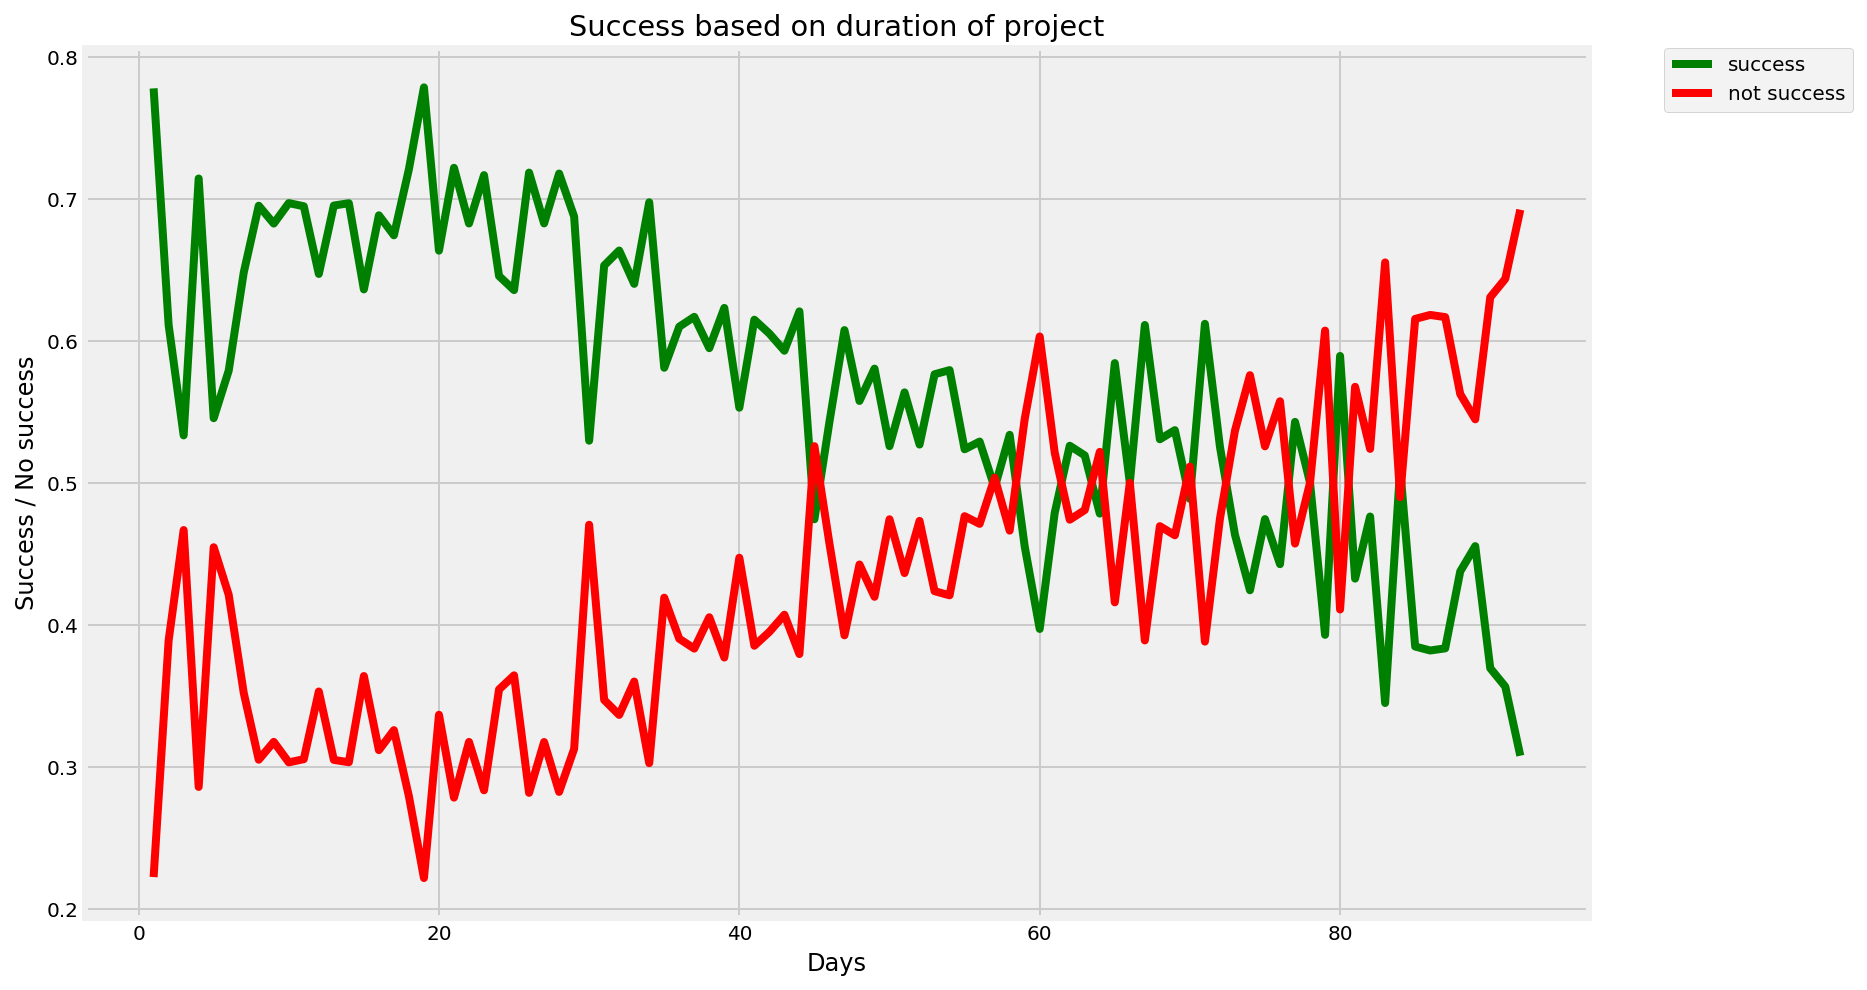

In [22]:
# make line chart
y1 = banan['success rate'].values
x1 = banan.index.values

y2 = banan['no success rate'].values
x2 = banan.index.values

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.plot(x1, y1, label="success", color='g')
ax.plot(x2, y2, label="not success", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('Success / No success')
plt.title('Success based on duration of project')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

Comment: In general it seems like a very long duratin increases your chances to have a successfull kickstarter prodject. 

## Was the initial findings in themself correct?

In [23]:
### All columns in df, list not truncated
for col in data.columns: 
    print(col) 

project id
name
url
category
subcategory
city
state
global
status
canceled
failed
live
successful
suspended
goal
pledged
funded percentage
backers
funded date
levels
reward levels
min reward level
max reward level
updates
comments
duration
weekday
weekday_nr
nr_in_month
month
month_nr
year
time
date


### Best lenght for compaign?

In [25]:
# I only want to look at the data for successful projects
data_success = data.loc[data['status'] == 'successful']
data_success.head(3)

,project id,name,url,category,subcategory,city,state,global,status,canceled,...,comments,duration,weekday,weekday_nr,nr_in_month,month,month_nr,year,time,date
0,39409,while the trees sleep,http://www.kickstarter.com/projects/emiliesaba...,Film_Video,Short Film,Columbia,MO,US,successful,0,...,2,30.0,Fri,5,19,Aug,8,2011,19:28:17 -0000,2011-08-19
3,237090,getting over - one son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film_Video,Documentary,Los Angeles,CA,US,successful,0,...,0,32.0,Sun,7,8,Apr,4,2012,02:14:00 -0000,2012-04-08
5,316217,dinner party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film_Video,Short Film,Portland,OR,US,successful,0,...,0,21.0,Wed,3,22,Jun,6,2011,13:33:00 -0000,2011-06-22


In [26]:
citron = data_success.groupby('duration').mean()
citron['pledged'].head()

duration
1.0    1007.000000
2.0    3994.454545
3.0    1461.875000
4.0     723.600000
5.0    1461.833333
Name: pledged, dtype: float64

In [27]:
citron['pledged'].describe()

count       92.000000
mean      7376.208292
std       6887.834941
min        723.600000
25%       4549.557479
50%       6486.940385
75%       8539.003375
max      63896.774725
Name: pledged, dtype: float64

In [28]:
cykel = data_success.groupby('duration').median()
cykel['pledged'].head()

duration
1.0     472.0
2.0     162.0
3.0     465.0
4.0     693.5
5.0    1018.0
Name: pledged, dtype: float64

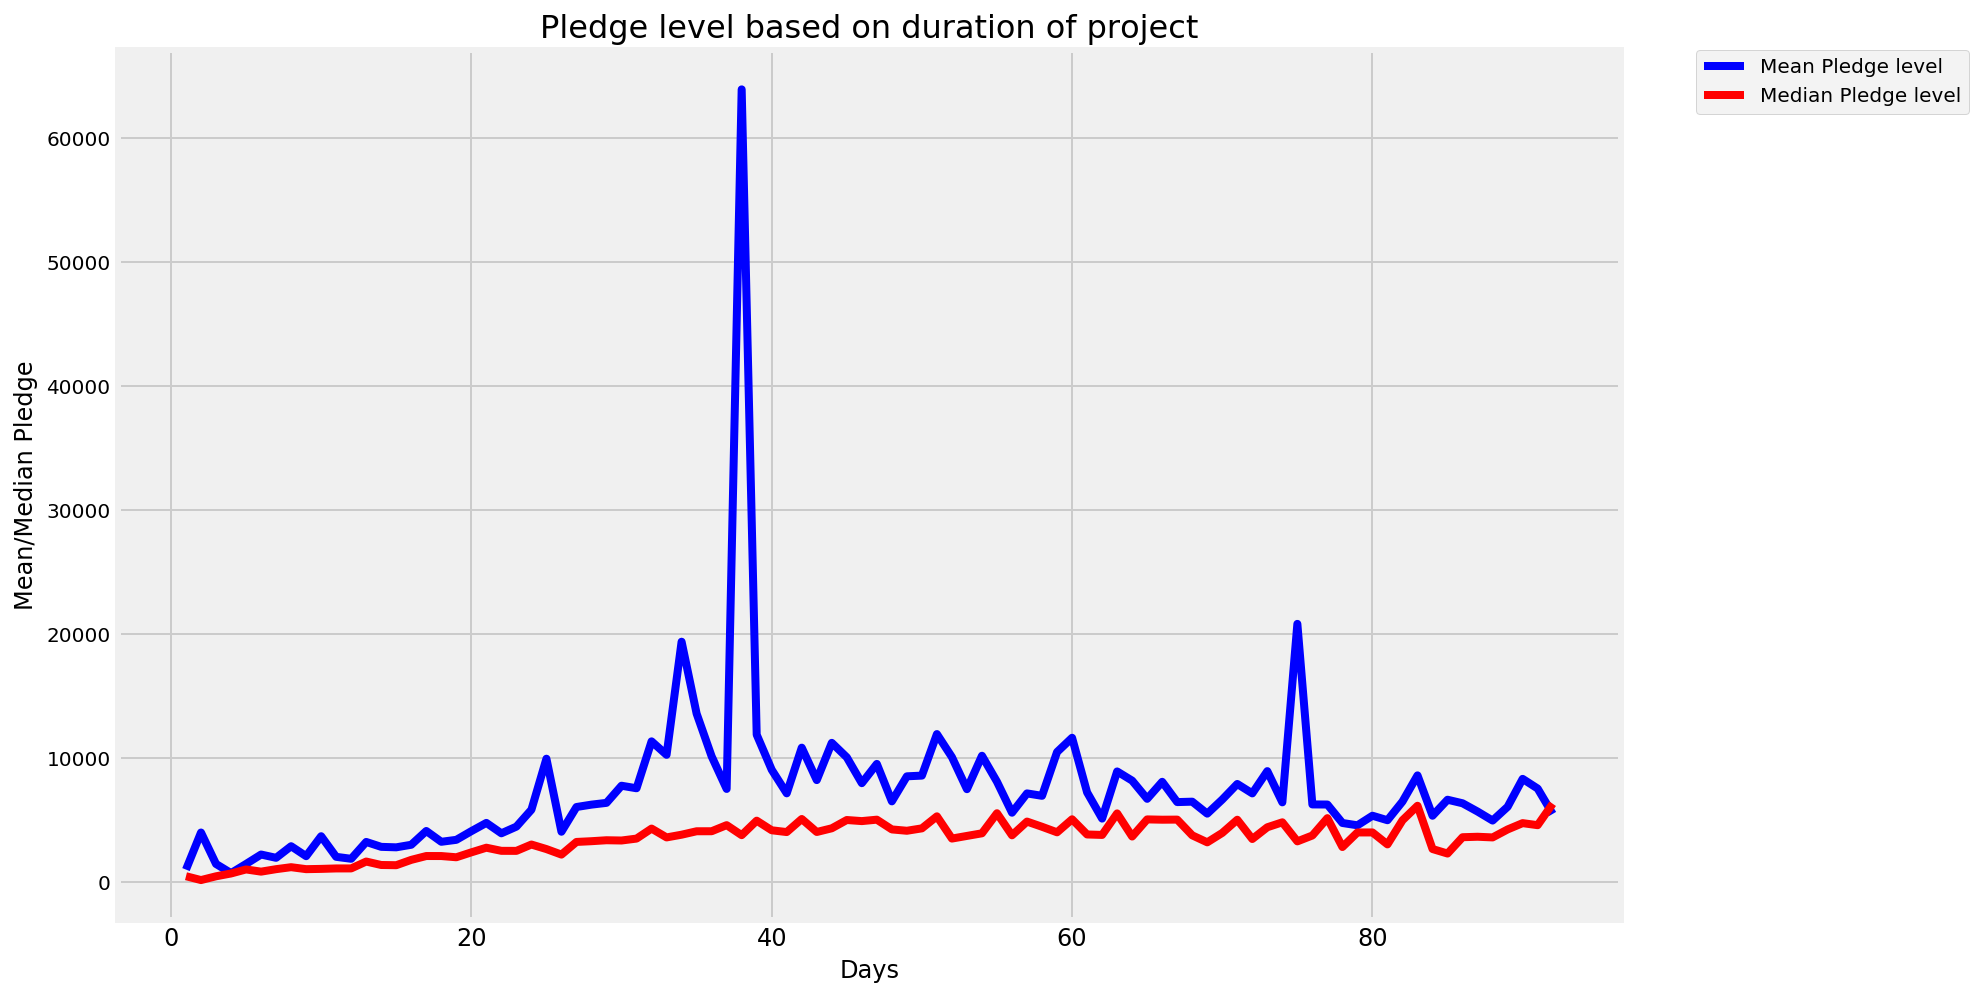

In [29]:
# make line chart
y1 = citron['pledged'].values
x1 = citron.index.values

y2 = cykel['pledged'].values
x2 = cykel.index.values

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.plot(x1, y1, label="Mean Pledge level", color='b')
ax.plot(x2, y2, label="Median Pledge level", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('Mean/Median Pledge')
plt.title('Pledge level based on duration of project')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

Comment: We have some extreme values. In this case I will use median instead om mean to handle this problem. 

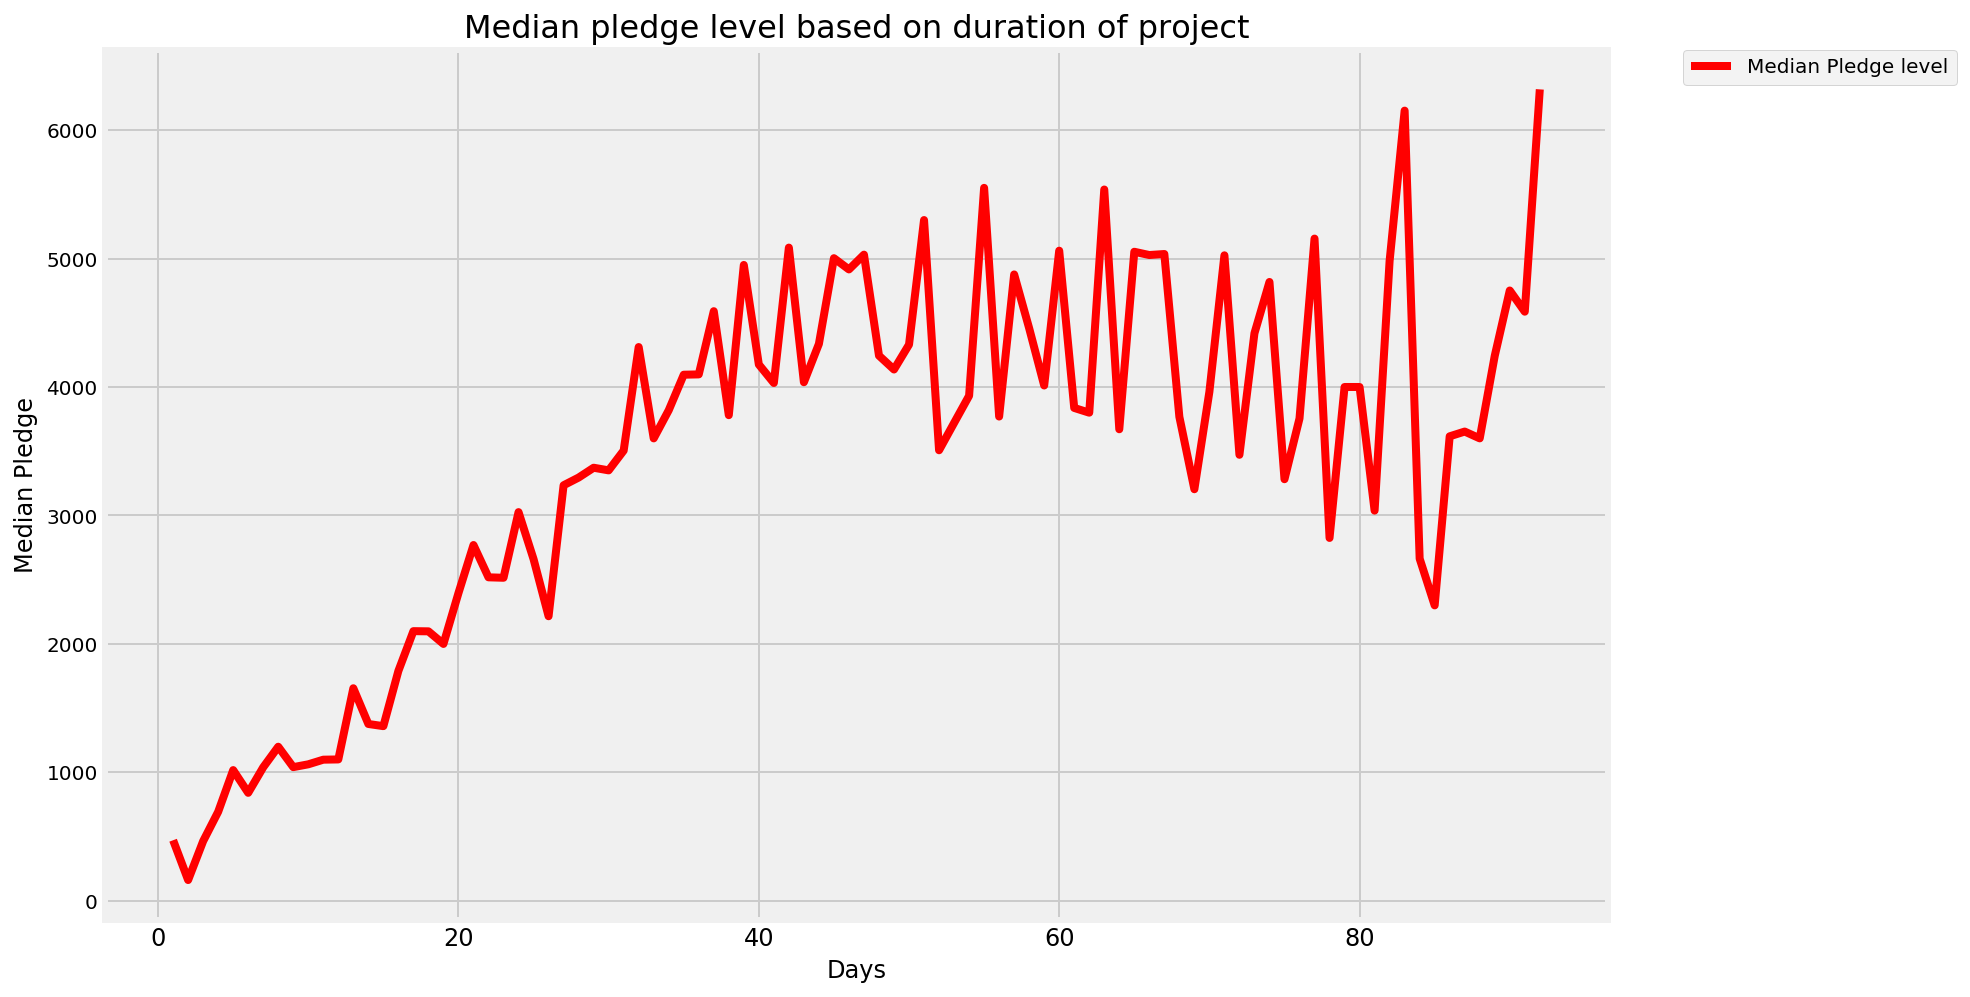

In [31]:
# make line chart
y2 = cykel['pledged'].values
x2 = cykel.index.values

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.plot(x2, y2, label="Median Pledge level", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('Median Pledge')
plt.title('Median pledge level based on duration of project')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

### Comment:

Initial finding:

more then $6,000 - 35 days

less then $6,000 - a shorter duration is better

After second analysis:

It seems like the initial finding was slitly off since I did not consider extreme values.

In [36]:
# make DF for successful projects vid duration of 35 days or longer
data_success_35 = data_success.loc[data_success['duration'] >= 35]
data_success_35.head()

,project id,name,url,category,subcategory,city,state,global,status,canceled,...,comments,duration,weekday,weekday_nr,nr_in_month,month,month_nr,year,time,date
8,436325,music - comedy - album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,Chicago,IL,US,successful,0,...,1,68.0,Sun,7,18,Apr,4,2010,04:59:00 -0000,2010-04-18
9,610918,the apocalypse calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,Chicago,IL,US,successful,0,...,5,35.0,Tue,2,1,Nov,11,2011,04:59:00 -0000,2011-11-01
11,727286,offline wikipedia iphone app,http://www.kickstarter.com/projects/dphiffer/o...,Technology,Open Software,X,X,X,successful,0,...,19,80.0,Tue,2,14,Jul,7,2009,06:59:59 -0000,2009-07-14
12,735377,the janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Music,Indie Rock,Ashland,OR,US,successful,0,...,12,45.0,Fri,5,10,Dec,12,2010,20:00:07 -0000,2010-12-10
22,1253029,release sxip shirey's sonic new york,http://www.kickstarter.com/projects/sxipshirey...,Music,Music,New York,NY,US,successful,0,...,9,88.0,Thu,4,26,Nov,11,2009,18:38:00 -0000,2009-11-26


In [37]:
# Average pledge for successful projects with duration of 35 days or longer
data_success_35['pledged'].mean()

10613.392437667422

In [38]:
# Median pledge for successful projects with duration of 35 days or longer
data_success_35['pledged'].median()

4499.0

In [39]:
# make DF for successful projects vid duration of 34 days or less
data_success_34 = data_success.loc[data_success['duration'] <= 34]
data_success_34.head()

,project id,name,url,category,subcategory,city,state,global,status,canceled,...,comments,duration,weekday,weekday_nr,nr_in_month,month,month_nr,year,time,date
0,39409,while the trees sleep,http://www.kickstarter.com/projects/emiliesaba...,Film_Video,Short Film,Columbia,MO,US,successful,0,...,2,30.0,Fri,5,19,Aug,8,2011,19:28:17 -0000,2011-08-19
3,237090,getting over - one son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film_Video,Documentary,Los Angeles,CA,US,successful,0,...,0,32.0,Sun,7,8,Apr,4,2012,02:14:00 -0000,2012-04-08
5,316217,dinner party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film_Video,Short Film,Portland,OR,US,successful,0,...,0,21.0,Wed,3,22,Jun,6,2011,13:33:00 -0000,2011-06-22
7,407836,help aporta continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,Chicago,IL,US,successful,0,...,5,30.0,Fri,5,30,Dec,12,2011,04:36:53 -0000,2011-12-30
15,958158,ggs film,http://www.kickstarter.com/projects/2081504493...,Film_Video,Short Film,Chicago,IL,US,successful,0,...,0,30.0,Wed,3,20,Jul,7,2011,22:46:51 -0000,2011-07-20


In [40]:
# Average pledge for successful projects with duration of 34 days or less
data_success_34['pledged'].mean()

7171.590365096197

In [41]:
# Median pledge for successful projects with duration of 34 days or less
data_success_34['pledged'].median()

3040.0

In [35]:
cykel.head()

,project id,canceled,failed,live,successful,suspended,goal,pledged,funded percentage,backers,levels,min reward level,max reward level,updates,comments,weekday_nr,nr_in_month,month_nr,year
duration,,,,,,,,,,,,,,,,,,,
1.0,1.175306e+09,0.0,0.0,0.0,1.0,0.0,180.0,472.0,1.138462,7.0,2.0,10.0,25.0,2.0,0.0,5.0,17.0,4.0,2011.0
2.0,8.738815e+08,0.0,0.0,0.0,1.0,0.0,125.0,162.0,1.842000,8.0,4.0,1.0,100.0,2.0,0.0,5.0,20.0,7.0,2011.0
3.0,9.419176e+08,0.0,0.0,0.0,1.0,0.0,400.0,465.0,1.407667,18.0,5.0,7.5,180.0,2.0,1.0,4.0,20.0,4.0,2011.0
4.0,1.369296e+09,0.0,0.0,0.0,1.0,0.0,500.0,693.5,1.386650,24.5,4.0,5.0,75.0,1.5,1.0,4.5,14.0,5.5,2011.0
5.0,1.147704e+09,0.0,0.0,0.0,1.0,0.0,850.0,1018.0,1.292536,19.5,4.0,5.0,100.0,2.0,0.0,4.0,13.5,5.0,2011.5


Hantera extremvarden genom att titta pa pledge medianvardet for varje duration. Hitta basta pledge for varje duration och dra generell slutsats...

### Different pledge goals at low and high amonts
But for both intervals a low pledge seem to me more successful. (No surprise)

In [21]:
data['pledged'].head(10)

0    11545.0
1       20.0
2       56.0
3     6535.0
4        0.0
5     3582.0
6      280.0
7     2180.0
8     1125.0
9     9836.0
Name: pledged, dtype: float64

In [27]:
# I have to make intervalls for the different pledge levels

### Some types of campaign are more successful than others
<u>Category</u>

Dance, theater, music (most successfull)

Fashion, publishing, technology (fashion is by far least successfull)


<u>Sub categorys of the Music category</u>

Indie rock, country & folk, jazz, Classical music (most successfull)

Hip hop, electronic music, world music (Hip hop is by far least successfull)

### When to launch?

Results from excel analysis...

Month: February

Day: Monday

Time: 9:00 am (EST)

(The variables was studied individually, this means that a Monday in February at 9:00 am might not necessarily be the best time.)

In [88]:
data['status'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

#### Best month to launch

In [89]:
# New df based on month and status dummies
best_month = data.groupby(['month'])[['successful', 'failed', 'live', 'canceled', 'suspended']].sum()

best_month

,successful,failed,live,canceled,suspended
month,,,,,
Apr,2924,2189,0,0,0
Aug,1662,1372,1,0,0
Dec,1722,1558,0,0,0
Feb,1761,1463,0,0,0
Jan,1655,1441,0,0,0
Jul,1504,1332,709,5,0
Jun,1530,1309,3194,41,4
Mar,2580,1960,0,0,0
May,3037,2659,0,13,0


In [90]:
# Creat a column for total number of projects
best_month['total'] = best_month[['successful', 'failed', 'live', 'canceled', 'suspended']].sum(axis=1)

best_month

,successful,failed,live,canceled,suspended,total
month,,,,,,
Apr,2924,2189,0,0,0,5113
Aug,1662,1372,1,0,0,3035
Dec,1722,1558,0,0,0,3280
Feb,1761,1463,0,0,0,3224
Jan,1655,1441,0,0,0,3096
Jul,1504,1332,709,5,0,3550
Jun,1530,1309,3194,41,4,6078
Mar,2580,1960,0,0,0,4540
May,3037,2659,0,13,0,5709


In [ ]:
## How to handle that there are live projects in June and July at the moment...

In [91]:
# Look at the successrate per month
best_month['successful'] / best_month['total']

month
Apr    0.571876
Aug    0.547611
Dec    0.525000
Feb    0.546216
Jan    0.534561
Jul    0.423662
Jun    0.251728
Mar    0.568282
May    0.531967
Nov    0.574194
Oct    0.546237
Sep    0.544594
dtype: float64

BEST MONTH = November

#### Best day of the week to launch

In [92]:
# Make a new df based on weekday and status dummies
best_weekday = data.groupby(['weekday'])[['successful', 'failed', 'live', 'canceled', 'suspended']].sum()

best_weekday 

,successful,failed,live,canceled,suspended
weekday,,,,,
Fri,3407,2897,595,11,2
Mon,3410,2701,547,8,1
Sat,3673,3029,714,12,0
Sun,3401,2845,716,10,0
Thu,3300,2639,528,8,0
Tue,2764,2390,399,6,0
Wed,2953,2421,405,4,1


In [93]:
# Creat a column for total number of projects
best_weekday['total'] = best_weekday[['successful', 'failed', 'live', 'canceled', 'suspended']].sum(axis=1)

best_weekday

,successful,failed,live,canceled,suspended,total
weekday,,,,,,
Fri,3407,2897,595,11,2,6912
Mon,3410,2701,547,8,1,6667
Sat,3673,3029,714,12,0,7428
Sun,3401,2845,716,10,0,6972
Thu,3300,2639,528,8,0,6475
Tue,2764,2390,399,6,0,5559
Wed,2953,2421,405,4,1,5784


In [ ]:
### Should we take the rate of live projcets into consideration...

In [94]:
# Look at the successrate per weekday
best_weekday['successful'] / best_weekday['total']

weekday
Fri    0.492911
Mon    0.511474
Sat    0.494480
Sun    0.487808
Thu    0.509653
Tue    0.497212
Wed    0.510546
dtype: float64

BEST DAY OF THE WEEK =  Monday

#### Best time of the day to launch

In [95]:
data['time'].dtype 

dtype('O')

In [ ]:
# the column is not date time format any more

In [97]:
data['time'].head()

0    19:28:17 -0000
1    03:59:00 -0000
2    00:00:31 -0000
3    02:14:00 -0000
4    15:25:39 -0000
Name: time, dtype: object

In [ ]:
# remove '-0000' from time column

In [96]:
data['time'].astype(str).str.split(':', expand=True).astype(int)

ValueError: invalid literal for int() with base 10: '17 -0000'

In [55]:
df[['h','m','s']] = df['time'].astype(str).str.split(':', expand=True).astype(int)

AttributeError: Can only use .dt accessor with datetimelike values

In [53]:
data.groupby(['time'])[['successful', 'failed', 'live', 'canceled', 'suspended']].sum()

,successful,failed,live,canceled,suspended
time,,,,,
00:00:00 -0000,239,126,36,1,0
00:00:01 -0000,1,0,0,0,0
00:00:02 -0000,1,0,0,0,0
00:00:04 -0000,2,0,0,0,0
00:00:06 -0000,0,1,0,0,0
00:00:07 -0000,0,1,0,0,0
00:00:09 -0000,1,0,0,0,0
00:00:10 -0000,0,1,0,0,0
00:00:12 -0000,0,1,0,0,0


### More comments, more success

Dubble the successrate with 1-2 comments

Tripple the successrate with 10 comments

## Do some kind of model to se what components in the most importent for a successfull project